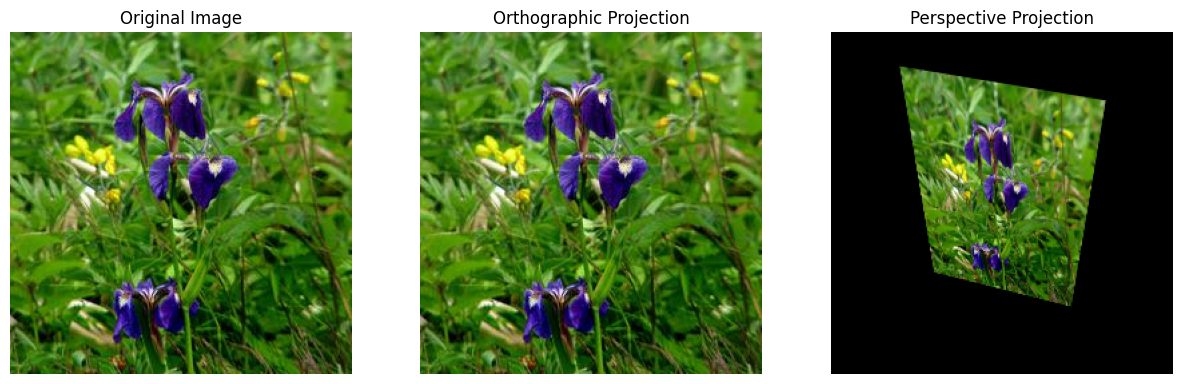

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to folder
folder = '/kaggle/input/iris-computer-vision/iris-setosa'
image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Process first image
img_path = os.path.join(folder, image_files[0])
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not found!")

h, w = img.shape[:2]

# --- Perspective Projection Example ---
pts_src = np.float32([[0,0], [w-1,0], [w-1,h-1], [0,h-1]])
pts_dst = np.float32([[w*0.2,h*0.1], [w*0.8,h*0.2], [w*0.7,h*0.8], [w*0.3,h*0.7]])
M = cv2.getPerspectiveTransform(pts_src, pts_dst)
perspective_img = cv2.warpPerspective(img, M, (w,h))

# --- Orthographic Projection Example (simulated as simple scaling) ---
orthographic_img = cv2.resize(img, (w, h))  # simple top-down / parallel projection

# Display results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(orthographic_img, cv2.COLOR_BGR2RGB))
plt.title('Orthographic Projection')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(perspective_img, cv2.COLOR_BGR2RGB))
plt.title('Perspective Projection')
plt.axis('off')

plt.show()


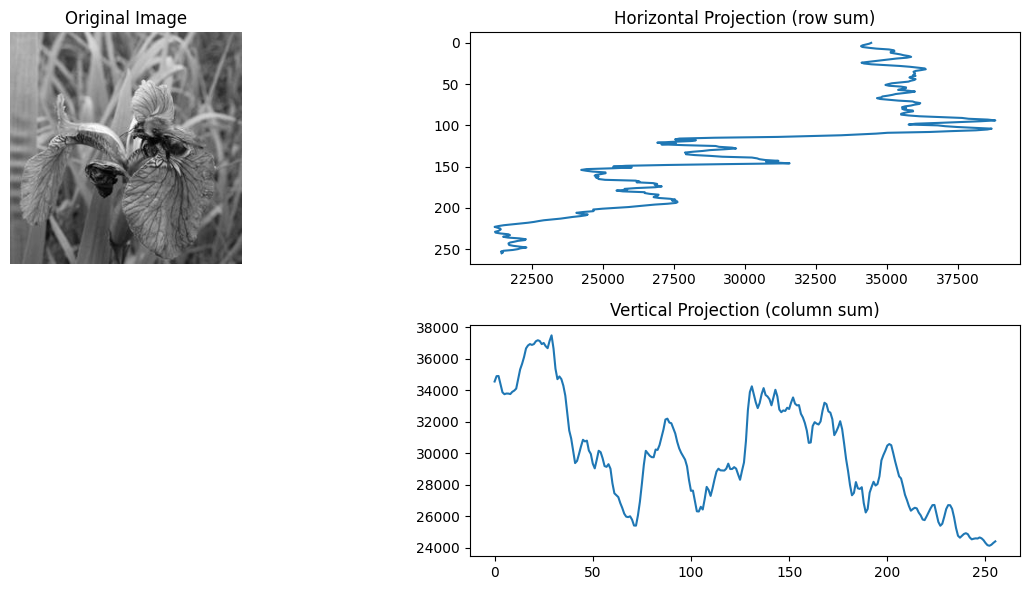

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img_path = '/kaggle/input/iris-computer-vision/iris-setosa/iris-01ab65973fd487a6cee4c5af1551c42b264eec5abab46bffd7c307ffef647e11.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Safety check
if img is None:
    raise ValueError("Image not found. Check the path!")

# Compute projections
horizontal_proj = np.sum(img, axis=1)  # sum along columns → 1D array for each row
vertical_proj = np.sum(img, axis=0)    # sum along rows → 1D array for each column

# Display original image and projections
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(horizontal_proj, np.arange(len(horizontal_proj)))
plt.gca().invert_yaxis()  # optional: top of image = top of plot
plt.title('Horizontal Projection (row sum)')

plt.subplot(2,2,4)
plt.plot(np.arange(len(vertical_proj)), vertical_proj)
plt.title('Vertical Projection (column sum)')

plt.tight_layout()
plt.show()
